###### Catalina Rodríguez Buss
###### Astrometría 1

## **Informe 3: Bases de Datos** 

### **1.1. Introducción**

Debido a que las nuevas tecnologías aportan cantidades significativas de datos, se hace imperiosa la necesidad de almacenar los mismos de manera que su acceso sea útil y eficiente. En general, la información de grandes relevamientos, simulaciones numéricas, etc. está organizada en *Bases de datos*. Uno de los paradigmas más utilizado para organizar bases de datos es el de la Base de datos Relacional. En este tipo de modelo la información se organiza en tablas, que se relacionan entre sí a partir de una propiedad de los datos. Cada tabla es un conjunto de registros. Existen programas o sistemas de gestión de bases de datos relacionales. Entre los mas conocidos, se destecan por ejemplo  MySQL, PostgreSQL, Oracle y Microsoft SQL Server.

Finalmente, en este informe se busca generar una familiaridad con el uso de las bases de datos, para lograr extraer información, procesarla y analizarla, utilizando principios de probabilidad y estadística. 

##### **1.2. Conceptos importantes**

Antes de comenzar con este informe, es importante tener algunos **conceptos básicos**:

**Base de datos:** Conjunto de datos pertenecientes a un mismo contexto y almacenados sistemáticamente para sus registros.

**Tabla:** Es un conjunto de datos con ciertas características en común. 

**Registro:** Es un objeto único de datos implícitamente estructurados en una tabla. Corresponde a una fila en las tablas.

**Campo:** Es la mínima unidad de información a la que se puede acceder. Corresponde a una columna de una tabla. 

**Relación:** Vínculo entre los campos de distintas tablas. La información está organizada en tablas, pero se puede reunir utilizando vínculos.  

##### **1.3. Structured Query Language**

Por último, hace falta introducir el lenguaje que será utilizado: SQL (Structured Query Language). Es un lenguaje de dominio específico, diseñado para administrar, y recuperar información de sistemas de gestión de bases de datos relacionales. Una de sus principales características es el manejo del álgebra y el cálculo relacional para efectuar consultas con el fin de recuperar, de forma sensilla, información de bases de datos, así como realizar cambios en ellas. 

Originalmente, SQL consiste en un lenguaje de definición, manipulación y control de datos. El alcance de SQL incluye la inserción de datos, consultas, analizaciones y borrado, la creación y modificación de esquemas y el control de acceso a los datos. 

Luego, en este trabajo se utiliza SQL para obtener los datos de un catálogo de exoplanetas de la base de datos **exoplanet.eu**. 

### **2. Procedimiento**

#### **2.1. Problema 6**

***Estudie la distribución de índices de masas y períodos orbitales para planetas descubiertos con diferentes técnicas observacionales. Determine si existe un sesgo en las propiedades de los exoplanetas en función del tipo de técnica utilizada.***

##### **2.1.2. Primer paso**

El primer paso a realizar es ingresar al tutorial que ofrece la página de la base de datos, [exoplanet.eu](http://exoplanet.eu/API/), que detalla paso por paso cómo obtener los datos requeridos de los exoplanetas. Entonces, una vez instaladas todas las librerías que se necesitarán, se escribe un **query** con las propiedades deseadas: identificación del objeto, período, masa, tipo espectral y tipo de detección. 

In [1]:
import numpy as np #se importan las librebrias necesarias
import matplotlib.pyplot as plt
import pyvo
import pandas as pd 
import scipy.stats as sp
# pip install scikit-learn 
# from sklearn.model_selection import train_test_split

In [2]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [3]:
query = """SELECT granule_uid,obs_id,period,mass,star_spec_type,detection_type 
FROM exoplanet.epn_core 
WHERE mass < 15 AND period>0 AND star_distance>0 """

In [4]:
results = service.search(query)

In [5]:
len(results)  # cantidad de planetas

1150

In [6]:
len(results[0]) # cantidad de columnas

6

In [7]:
table=results.to_table() # se  transforma results en una tabla de astropy

In [8]:
df=table.to_pandas() # se transforma table en un data frame de pandas

In [9]:
df # para visualizar el data frame

,granule_uid,obs_id,period,mass,star_spec_type,detection_type
0,14 Her b,77,1763.300000,9.10000,K0 V,Radial Velocity
1,14 Her c,309,52596.000000,6.90000,K0 V,Radial Velocity
2,55 Cnc b,25,14.653140,0.84000,K0IV-V,Radial Velocity
3,51 Eri b,2428,10260.000000,2.60000,F0IV,Imaging
4,51 Peg b,12,4.230800,0.47000,G2 IV,Radial Velocity
...,...,...,...,...,...,...
1145,pi Men b,83,2088.330000,12.60000,G0V,Radial Velocity
1146,pi Men c,6825,6.267852,0.01142,G0V,Primary Transit
1147,tau Boo A b,7,3.312490,5.84000,F7 V,Radial Velocity
1148,ups And b,13,4.617110,0.62000,F8 V,Radial Velocity


In [10]:
df.set_index("granule_uid",inplace=True) #  granule_uid pasa a ser el nuevo índice

Finalmente, se obtiene el data frame de los datos de los exoplanetas.

In [11]:
df

,obs_id,period,mass,star_spec_type,detection_type
granule_uid,,,,,
14 Her b,77,1763.300000,9.10000,K0 V,Radial Velocity
14 Her c,309,52596.000000,6.90000,K0 V,Radial Velocity
55 Cnc b,25,14.653140,0.84000,K0IV-V,Radial Velocity
51 Eri b,2428,10260.000000,2.60000,F0IV,Imaging
51 Peg b,12,4.230800,0.47000,G2 IV,Radial Velocity
...,...,...,...,...,...
pi Men b,83,2088.330000,12.60000,G0V,Radial Velocity
pi Men c,6825,6.267852,0.01142,G0V,Primary Transit
tau Boo A b,7,3.312490,5.84000,F7 V,Radial Velocity


In [12]:
df.to_csv("Exoplanetas.csv") # se está guardando en el jupyter

##### **2.1.3. Segundo paso**

En segundo lugar, del data frame original se filtran los datos de los exoplanetas correspondientes a cada tipo de detección: velocidad radial, imágen, astrometría, otra, TTV, microlentes y pulsar.  Para ello, se utiliza el método ***loc***, que selecciona el conjunto de datos del df que se necesite. 

In [13]:
radial= df.loc[:,"detection_type"] == "Radial Velocity" # condición
df_radial= df.loc[radial] # se le esta pidiendo que en data frame  localice esa condicion
df_radial

,obs_id,period,mass,star_spec_type,detection_type
granule_uid,,,,,
14 Her b,77,1763.30000,9.10000,K0 V,Radial Velocity
14 Her c,309,52596.00000,6.90000,K0 V,Radial Velocity
55 Cnc b,25,14.65314,0.84000,K0IV-V,Radial Velocity
51 Peg b,12,4.23080,0.47000,G2 IV,Radial Velocity
CD Cet b,7415,2.29070,0.01244,M5.0,Radial Velocity
...,...,...,...,...,...
eps Ind A b,6731,16509.00000,3.25000,K2V,Radial Velocity
pi Men b,83,2088.33000,12.60000,G0V,Radial Velocity
tau Boo A b,7,3.31249,5.84000,F7 V,Radial Velocity


Análogamente, 

In [14]:
imaging= df.loc[:,"detection_type"] == "Imaging" # imagen directa
df_imaging= df.loc[imaging] 

primarytransit= df.loc[:,"detection_type"] == "Primary Transit" 
df_primarytransit= df.loc[primarytransit] 

astrometry= df.loc[:,"detection_type"] == "Astrometry" 
df_astrometry= df.loc[astrometry] 

other= df.loc[:,"detection_type"] == "Other" 
df_other= df.loc[other] 

TTV= df.loc[:,"detection_type"] == "TTV" # tiempo de variacion de transito
df_TTV= df.loc[TTV] 

microlensing= df.loc[:,"detection_type"] == "Microlensing" # micro lentes 
df_microlensing= df.loc[microlensing] 

pulsar= df.loc[:,"detection_type"] == "Pulsar" 
df_pulsar= df.loc[pulsar] 

Para tener alguna representación de los datos, se hace un gráfico **Masa vs Período**, con todas las ténicas superpuestas.

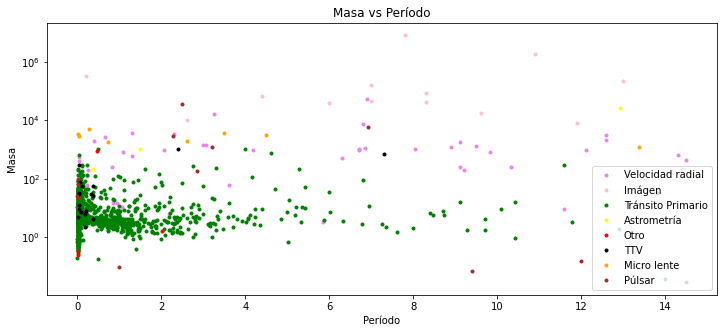

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df_radial["mass"],df_radial["period"],'o', color='violet', ms=3, label='Velocidad radial')
plt.plot(df_imaging["mass"],df_imaging["period"],'o', color='pink', ms= 3, label='Imágen')
plt.plot(df_primarytransit["mass"],df_primarytransit["period"],'o', color='green', ms=3, label='Tránsito Primario')
plt.plot(df_astrometry["mass"],df_astrometry["period"],'o', color='yellow', ms=3, label='Astrometría')
plt.plot(df_other["mass"],df_other["period"],'o', color='red', ms=3, label='Otro')
plt.plot(df_TTV["mass"],df_TTV["period"],'o', color='black', ms=3, label='TTV')
plt.plot(df_microlensing["mass"],df_microlensing["period"],'o', color='orange', ms=3, label='Micro lente')
plt.plot(df_pulsar["mass"],df_pulsar["period"],'o', color='brown', ms=3, label='Púlsar')
plt.legend(loc='best', fontsize=10)
plt.yscale('log')
plt.xlabel("Período")
plt.ylabel("Masa")
plt.title("Masa vs Período")
plt.show()

##### **2.1.4. Tercer paso**

A continuación se realizan dos tipos de histogramas: uno con las masas y otro con los períodos, superponiendo en un mismo gráfico el histograma para cada técnica. De esta manera, al estar todos juntos, es posible determinar si hay algún sesgo en ellos. Es decir, si por ejemplo hay alguna técnica que favorece la detección de exoplanetas con alguna masa en particular. 

**Histogramas con las masas**

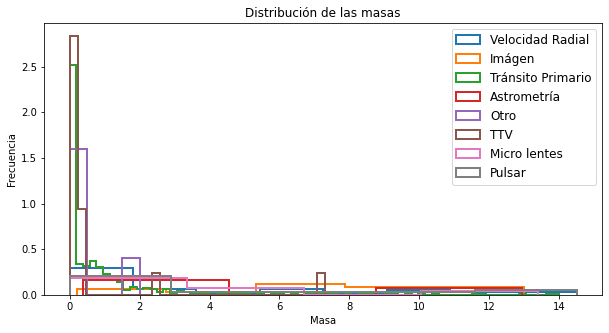

In [17]:
plt.figure(figsize=(10,5))
plt.hist(df_radial['mass'], bins= 'auto', density= True, histtype= 'step', label='Velocidad Radial', lw=2)
plt.hist(df_imaging['mass'], bins= 'auto', density= True, histtype= 'step', label='Imágen', lw=2)
plt.hist(df_primarytransit['mass'], bins= 'auto', density= True, histtype= 'step', label='Tránsito Primario', lw=2)
plt.hist(df_astrometry['mass'], bins= 'auto', density= True, histtype= 'step', label='Astrometría', lw=2)
plt.hist(df_other['mass'], bins= 'auto', density= True, histtype= 'step', label='Otro', lw=2)
plt.hist(df_TTV['mass'], bins= 'auto', density= True, histtype= 'step', label='TTV', lw=2)
plt.hist(df_microlensing['mass'], bins= 'auto', density= True, histtype= 'step', label='Micro lentes', lw=2)
plt.hist(df_pulsar['mass'], bins= 'auto', density= True, histtype= 'step', label='Pulsar', lw=2)
plt.legend(fontsize=12, loc='best')
plt.xlabel('Masa')
plt.ylabel('Frecuencia')
plt.title('Distribución de las masas')
plt.show()

**Histogramas con los períodos**

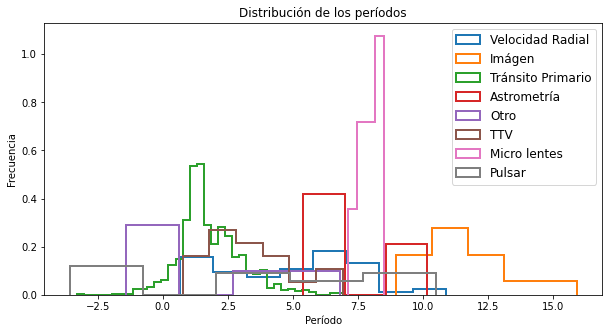

In [18]:
plt.figure(figsize=(10,5))
plt.hist(np.log(df_radial['period']), bins= 'auto', density= True, histtype= 'step', label='Velocidad Radial', lw=2)
plt.hist(np.log(df_imaging['period']), bins= 'auto', density= True, histtype= 'step', label='Imágen', lw=2)
plt.hist(np.log(df_primarytransit['period']), bins= 'auto', density= True, histtype= 'step', label='Tránsito Primario', lw=2)
plt.hist(np.log(df_astrometry['period']), bins= 'auto', density= True, histtype= 'step', label='Astrometría', lw=2)
plt.hist(np.log(df_other['period']), bins= 'auto', density= True, histtype= 'step', label='Otro', lw=2)
plt.hist(np.log(df_TTV['period']), bins= 'auto', density= True, histtype= 'step', label='TTV', lw=2)
plt.hist(np.log(df_microlensing['period']), bins= 'auto', density= True, histtype= 'step', label='Micro lentes', lw=2)
plt.hist(np.log(df_pulsar['period']), bins= 'auto', density= True, histtype= 'step', label='Pulsar', lw=2)
plt.legend(fontsize=12, loc='best')
plt.xlabel('Período')
plt.ylabel('Frecuencia')
plt.title('Distribución de los períodos')
plt.show()

Haciendo un análisis visual de los histogramas, se puede ver que efectivamente existe algún tipo de sesgo en las propiedades de los exoplanetas según la técnica utilizada. Esto es notorio debido a que si no existieran sesgos, se esperaría que los histogramas para cada ténica  fueran muy parecidos entre sí. Sin embargo, se observa que cada ténica tiene su pico de distribución en diferentes masas  y períodos. Por ejemplo, por un lado, en el histograma de masas, es evidente que aquellos exoplanetas con masas más pequeñas son favorecidos a la hora de la detección mediante TTV, Otro y Tránsito Primario. Mientras que, por otro lado, en el histograma de los períodos se puede concluir rápidamente que la técnica por velocidad radial favorece notablemente a aquellos planetas con con masas entre 7 y 8, aproximadamente.  

#### **2.2.1. Problema 7**

***Estudie la distribución de distancias a las estrellas con exoplanetas y determine si la misma es consistente con una distribución gaussiana.***

##### **2.2.2. Primer paso**

Análogamente al Problema 6, se obtiene el data frame con la información necesaria para este problema: la distancia de la estrella al planeta.

In [19]:
query2 = """SELECT semi_major_axis, granule_uid 
FROM exoplanet.epn_core 
WHERE mass < 15 AND period>0 AND star_distance>0 """

In [20]:
results2 = service.search(query2)

In [21]:
table2=results2.to_table()

In [22]:
df2=table2.to_pandas()

In [23]:
df2

,semi_major_axis,granule_uid
0,2.84500,14 Her b
1,27.40000,14 Her c
2,0.11339,55 Cnc b
3,11.10000,51 Eri b
4,0.05200,51 Peg b
...,...,...
1145,3.30800,pi Men b
1146,0.06702,pi Men c
1147,0.04600,tau Boo A b
1148,0.05900,ups And b


In [24]:
df2.set_index("granule_uid",inplace=True)

In [25]:
df2

,semi_major_axis
granule_uid,
14 Her b,2.84500
14 Her c,27.40000
55 Cnc b,0.11339
51 Eri b,11.10000
51 Peg b,0.05200
...,...
pi Men b,3.30800
pi Men c,0.06702
tau Boo A b,0.04600


In [26]:
tablafinal=pd.merge(left=df, right=df2, how='inner', on='granule_uid')

In [27]:
tablafinal

,obs_id,period,mass,star_spec_type,detection_type,semi_major_axis
granule_uid,,,,,,
14 Her b,77,1763.300000,9.10000,K0 V,Radial Velocity,2.84500
14 Her c,309,52596.000000,6.90000,K0 V,Radial Velocity,27.40000
55 Cnc b,25,14.653140,0.84000,K0IV-V,Radial Velocity,0.11339
51 Eri b,2428,10260.000000,2.60000,F0IV,Imaging,11.10000
51 Peg b,12,4.230800,0.47000,G2 IV,Radial Velocity,0.05200
...,...,...,...,...,...,...
pi Men b,83,2088.330000,12.60000,G0V,Radial Velocity,3.30800
pi Men c,6825,6.267852,0.01142,G0V,Primary Transit,0.06702
tau Boo A b,7,3.312490,5.84000,F7 V,Radial Velocity,0.04600


##### **2.2.3. Segundo paso**

Se realiza un histograma para los datos obtenidos. Notar que el rango está restringido a [0,2] AU. Esto se debe a que si se toman todos los valores de la tabla, sin ninguna restricción, no se logra visualizar la distribución. Luego, hay que determinar si la distribución es consistente con una gaussiana. 

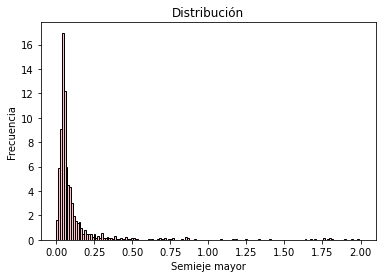

In [28]:
plt.hist(tablafinal['semi_major_axis'],range=[0,2], edgecolor='black',bins='auto', density=True, color='pink')
plt.xlabel('Semieje mayor')
plt.ylabel('Frecuencia')
plt.title('Distribución')
plt.show()

Como la variable semieje proviene de una distribución continua, para compararla con una distribución gaussiana se debe usar el KS Test. Para ello, se considera como hipótesis nula $H_0$ que ambas muestras provienen de la misma distribución y como hipótesis alternativa $H_a$ que ambas provienen de distribuciones diferentes. Luego, con el fin de encontrar el ***p-value*** se utiliza una función ya definida en scipy. 

In [29]:
xy= tablafinal['semi_major_axis'][(tablafinal['semi_major_axis']>0) & (tablafinal['semi_major_axis']<=2)] # se restringen los valores de la tabla

In [30]:
sp.kstest(xy,'norm') # función 

KstestResult(statistic=0.5017553403698662, pvalue=1.0258152160998686e-229)

Luego, como el p-value obtenido es muy cerano a 0, quiere decir que p siempre va a ser menor que cualquier $\alpha$ (nivel de significancia) que se proponga. Por lo tanto, nunca se va a poder aceptar la hipótesis nula.

#### **2.3.1. Problema 8**

***Grafique un gráfico de las masas y los radios de los planetas, proponga un modelo y realice un ajuste de ese modelo. Discuta el procedimiento para el ajuste del modelo.***

##### **2.3.2. Primer paso**

Análogamente a los problemas anteriores, lo primero que hay que hacer es seleccionar los datos que se quieren obtener de la tabla que se encuentra en la base de datos. Luego, estos serán los correspondientes a los radios de los exoplanetas.

In [31]:
query3 = """SELECT radius, granule_uid 
FROM exoplanet.epn_core 
WHERE mass < 15 AND period>0 AND star_distance>0 """

In [32]:
results3 = service.search(query3)

In [33]:
table3=results3.to_table()

In [34]:
df3=table3.to_pandas()

In [35]:
df3

,radius,granule_uid
0,NaN,14 Her b
1,NaN,14 Her c
2,NaN,55 Cnc b
3,1.11000,51 Eri b
4,1.90000,51 Peg b
...,...,...
1145,NaN,pi Men b
1146,0.16719,pi Men c
1147,1.06000,tau Boo A b
1148,NaN,ups And b


In [36]:
df3.set_index("granule_uid",inplace=True)

In [37]:
df3

,radius
granule_uid,
14 Her b,NaN
14 Her c,NaN
55 Cnc b,NaN
51 Eri b,1.11000
51 Peg b,1.90000
...,...
pi Men b,NaN
pi Men c,0.16719
tau Boo A b,1.06000


In [38]:
tablafinal2=pd.merge(left=tablafinal, right=df3, how='inner', on='granule_uid')

In [39]:
tablafinal2

,obs_id,period,mass,star_spec_type,detection_type,semi_major_axis,radius
granule_uid,,,,,,,
14 Her b,77,1763.300000,9.10000,K0 V,Radial Velocity,2.84500,NaN
14 Her c,309,52596.000000,6.90000,K0 V,Radial Velocity,27.40000,NaN
55 Cnc b,25,14.653140,0.84000,K0IV-V,Radial Velocity,0.11339,NaN
51 Eri b,2428,10260.000000,2.60000,F0IV,Imaging,11.10000,1.11000
51 Peg b,12,4.230800,0.47000,G2 IV,Radial Velocity,0.05200,1.90000
...,...,...,...,...,...,...,...
pi Men b,83,2088.330000,12.60000,G0V,Radial Velocity,3.30800,NaN
pi Men c,6825,6.267852,0.01142,G0V,Primary Transit,0.06702,0.16719
tau Boo A b,7,3.312490,5.84000,F7 V,Radial Velocity,0.04600,1.06000


In [40]:
tablafinal2.to_csv("Exoplanetas.csv") # se está guardando en el jupyter

##### **2.3.4. Segundo paso**

Lo primero a realizar es un gráfico masa vs radio para tener una primera muestra de la distribución de los datos.

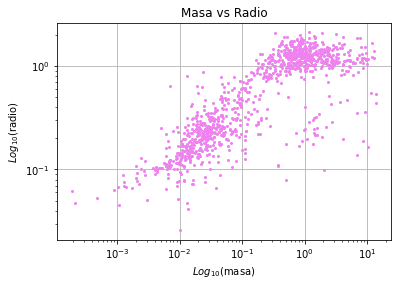

In [41]:
plt.plot(tablafinal2["mass"],tablafinal2["radius"],'o', color='violet', ms=2, label='Velocidad radial')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("$Log_{10}$(masa)")
plt.ylabel("$Log_{10}$(radio)")
plt.title("Masa vs Radio")
plt.grid()
plt.show()

##### **2.3.5. Tercer paso**

Ahora, a las tablas de masa y radio se les va a sacar los datos que aparecen como no determinados. Luego, se van a terminar creando dos series que no van a tener la misma longitud. Entonces, haciendo el merge entre ambas tablas, se logrará que ambas tengan la misma longitud.

In [42]:
x=tablafinal2["mass"][~tablafinal2["mass"].isna()]
y=tablafinal2["radius"][~tablafinal2["radius"].isna()]

tablafinal3=pd.merge(left=x, right=y, how='inner', on='granule_uid')
tablafinal3

,mass,radius
granule_uid,,
51 Eri b,2.60000,1.11000
51 Peg b,0.47000,1.90000
55 Cnc e,0.02703,0.17370
AU Mic b,0.03680,0.39080
AU Mic c,0.06980,0.31310
...,...,...
beta Pic b,11.90000,1.65000
beta Pic c,8.89000,1.20000
kappa And b,13.00000,1.20000


Finalmente, se está en condiciones de proponer un ajuste lineal para el gráfico obtenido anteriormente. Para ello se va a utilizar el ajuste polyfit (orden 1) con los x e y definidos anteriormente. De esta manera, se van a lograr obtener los parámetros buscados para ajustar una recta: ***pendiente y ordenada al orígen***. 

Notar que con este ajuste se consigue una relación entre la masa y el radio de la manera siguiente:

$$ log_{10}(R)= a log_{10}(M) + b  $$

Luego, pensando a la constante "b" como el logaritmo de otra constante c,

$$ b=log_{10}(c)$$

Y, utilizando propiedades del logaritmo, se puede llegar a la siguiente expresión final para el radio en función de la masa

$$ R= cM^a$$

Se prosigue a hacer el ajuste.

In [43]:
ajustelineal = np.polyfit(np.log(tablafinal3['mass']),np.log(tablafinal3['radius']),1)  

In [44]:
ajustelineal # en primer lugar aparece la pendiente, y en segundo la o.o

array([ 0.37756088, -0.06170537])

Por último, resta graficar.

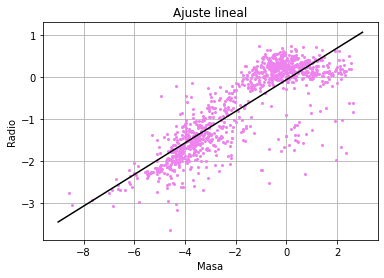

In [45]:
plt.plot(np.log(tablafinal2["mass"]),np.log(tablafinal2["radius"]),'o', color='violet', ms=2, label='Velocidad radial')
plt.xlabel("Masa")
plt.ylabel("Radio")
plt.title("Ajuste lineal")
t=np.linspace(-9,3,50)
plt.plot(t,ajustelineal[0]*t + ajustelineal[1], color='black', ms=2) # gráfico del ajuste lineal
plt.grid()
plt.show()

### **3. Conclusión**

Se puede concluir que SQL es muy útil a la hora de extraer datos de un sevidor, de exoplanetas en este caso. Incluso, permite la determinación en el query de qué datos de las tablas se quiere extraer. Luego, con el uso de Pandas y Scipy, estos datos pueden ser manipulados para obtener diferentes parámetros o incluso hacer ajustes lineales a los datos obtenidos.